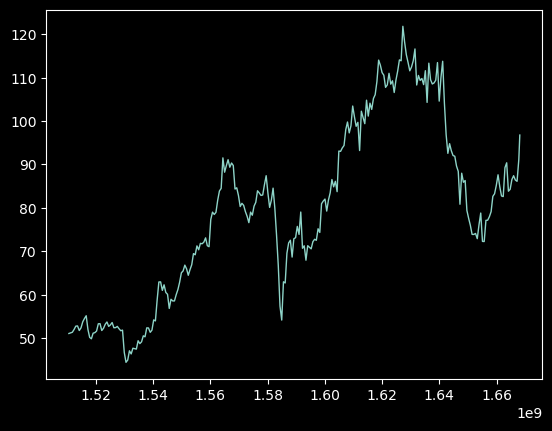

In [2]:
import csv
import yfinance as yf
import pendulum
import matplotlib.pyplot as plt

stock = "SBUX"

# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
price_history = yf.Ticker(stock).history(
    period='5y', interval='1wk', actions=False)
time_series = list(price_history['Open'])
dt_list = [pendulum.parse(
    str(dt)).float_timestamp for dt in list(price_history.index)]

# csvData = []
with open(f'data/{stock}.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(['time', 'data'])
    counter = 0
    for i in time_series:
        # csvData.append([time_series[counter], dt_list[counter]])
        writer.writerow([time_series[counter], dt_list[counter]])
        counter = counter + 1

plt.style.use('dark_background')
plt.plot(dt_list, time_series, linewidth=1)
plt.savefig(f'data/{stock}.png')
# plt.savefig('foo.pdf')
